<a href="https://colab.research.google.com/github/sky-akash/Quantamental-Study/blob/main/SimpleGNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch-geometric --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.8 MB/s eta 0:00:00


NameError: name 'node_features' is not defined

In [ ]:
import torch
from torch_geometric.data import Data
# Node features: Let's assume these are financial features such as stock price, revenue, etc.
# For simplicity, let's just use some dummy numbers for the node features.
node_features = [
# price , Revenue, Debt
    [100, 200, 300],  # Node 0 (Company A): [Stock Price, Revenue, Debt]
    [50, 100, 150],   # Node 1 (Company B)
    [75, 150, 225],   # Node 2 (Company C)
]

# Convert node features to a PyTorch tensor
x = torch.tensor(node_features, dtype=torch.float)

# Edge indices (source -> target node connections)
# [0, 1, 1, 2] means:
#  - Company A (Node 0) -> Company B (Node 1)
#  - Company A (Node 0) -> Company C (Node 2)
#  - Company B (Node 1) -> Company A (Node 0)
#  - Company C (Node 2) -> Company B (Node 1)
edge_index = torch.tensor([
    [0, 1, 1, 2],  # Source nodes
    [1, 0, 2, 1],  # Target nodes
], dtype=torch.long)

# Edge types:
#  - 0: Parent-Subsidiary (A -> B)
#  - 1: Sector (A -> C)
#  - 2: Price Correlation (B -> C)
edge_type = torch.tensor([0, 0, 1, 2], dtype=torch.long)

# Edge attributes: these could represent the strength of the relationships
# For example, we can assume:
#  - 1.0 means a strong relationship (for parent-subsidiary)
#  - 0.5 means a moderate relationship (for sector)
#  - 0.8 means a strong price correlation
edge_attr = torch.tensor([1.0, 1.0, 0.5, 0.8], dtype=torch.float)

# Create the Data object for the graph
data = Data(x=x, edge_index=edge_index, edge_type=edge_type, edge_attr=edge_attr)

# Let's check the data object
print(data)

Data(x=[3, 3], edge_index=[2, 4], edge_attr=[4], edge_type=[4])


In [ ]:
# Check the data object contents
print("Node Features (x):")
print(data.x)  # Display node features

print("\nEdge Indices (edge_index):")
print(data.edge_index)  # Display edge indices

print("\nEdge Types (edge_type):")
print(data.edge_type)  # Display edge types

print("\nEdge Attributes (edge_attr):")
print(data.edge_attr)  # Display edge attributes

Node Features (x):
tensor([[100., 200., 300.],
        [ 50., 100., 150.],
        [ 75., 150., 225.]])

Edge Indices (edge_index):
tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

Edge Types (edge_type):
tensor([0, 0, 1, 2])

Edge Attributes (edge_attr):
tensor([1.0000, 1.0000, 0.5000, 0.8000])


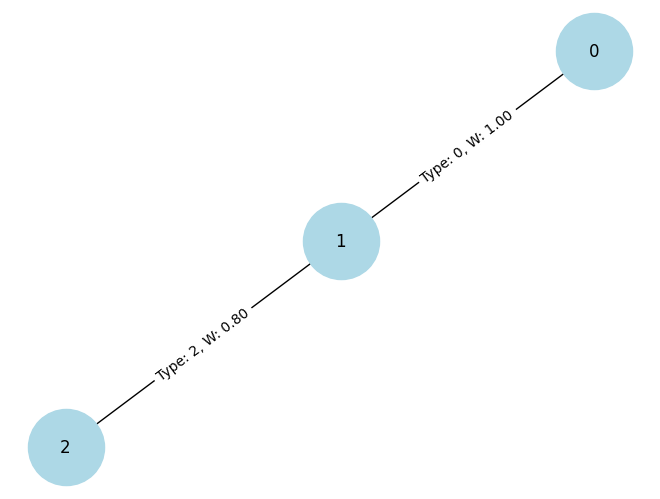

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (with features as attributes)
for i in range(data.x.shape[0]):
    G.add_node(i, feature=data.x[i].tolist())

# Add edges with edge types and attributes
for i in range(data.edge_index.shape[1]):
    source, target = data.edge_index[0, i].item(), data.edge_index[1, i].item()
    G.add_edge(source, target, edge_type=data.edge_type[i].item(), weight=data.edge_attr[i].item())

# Draw the graph
pos = nx.spring_layout(G)  # Positioning nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12)

# Draw edge labels (showing edge type and weight)
edge_labels = {(i, j): f"Type: {G[i][j]['edge_type']}, W: {G[i][j]['weight']:.2f}"
               for i, j in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

#### A simple GNN model in PyTorch Geometric can be defined as:

In [ ]:
import torch
from torch_geometric.data import Data
import random

# Simulate weekly data for 5 weeks
data_week_list = []

for week in range(5):  # Assuming 5 weeks of data
    # Simulating node features for 3 nodes (e.g., 3 features per node)
    node_features = [
        [random.randint(100, 200), random.randint(200, 300), random.randint(300, 400)],  # Node 0 (Company A)
        [random.randint(50, 150), random.randint(100, 200), random.randint(150, 250)],   # Node 1 (Company B)
        [random.randint(60, 160), random.randint(120, 220), random.randint(180, 280)],   # Node 2 (Company C)
    ]

    x = torch.tensor(node_features, dtype=torch.float)

    # Edge indices (source -> target connections)
    edge_index = torch.tensor([
        [0, 1, 1, 2],  # Source nodes
        [1, 0, 2, 1],  # Target nodes
    ], dtype=torch.long)

    # Edge types (example: 0 = parent-subsidiary, 1 = sector, 2 = price correlation)
    edge_type = torch.tensor([0, 0, 1, 2], dtype=torch.long)

    # Edge attributes (weights for each edge)
    edge_attr = torch.tensor([1.0, 1.0, 0.5, 0.8], dtype=torch.float)

    # Create the Data object for this week's graph
    data_week = Data(x=x, edge_index=edge_index, edge_type=edge_type, edge_attr=edge_attr)

    # Add a random target value (e.g., stock price or any other financial indicator)
    # Let's say we predict a value for each node in the graph, here we simulate random target values
    target = torch.tensor([random.uniform(10, 100) for _ in range(3)], dtype=torch.float).view(-1, 1)  # For 3 nodes

    # Assign the target value to data.y (ground truth labels)
    data_week.y = target

    # Add the graph to the list of weekly data snapshots
    data_week_list.append(data_week)

# Verify the structure of the data list (contains 5 weekly snapshots)
print(f"Number of weekly data snapshots: {len(data_week_list)}")


Number of weekly data snapshots: 5


In [ ]:
from torch_geometric.data import DataLoader

# Create a DataLoader to batch the weekly graph data
loader = DataLoader(data_week_list, batch_size=2, shuffle=True)

# Check one batch of data from the loader
for batch in loader:
    print(batch)
    break

DataBatch(x=[6, 3], edge_index=[2, 8], edge_attr=[8], edge_type=[8], y=[6, 1], batch=[6], ptr=[3])


/tmp/ipython-input-3300348565.py:4: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  loader = DataLoader(data_week_list, batch_size=2, shuffle=True)


In [ ]:
import torch.optim as optim
import torch.nn.functional as F

# Define a simple GCN model (previously defined GNN class)
class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x  # Final output (predicted values)

# Instantiate the model and optimizer
model = GNN(input_dim=3, hidden_dim=64, output_dim=1)  # Assuming 3 input features (node features)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define a loss function (e.g., Mean Squared Error for regression)
criterion = torch.nn.MSELoss()

# Training loop
for epoch in range(100):  # Number of epochs
    model.train()  # Set the model to training mode

    total_loss = 0
    for data in loader:  # Iterate through the weekly data batches
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass: Get predictions from the GNN model
        output = model(data)

        # Assume `data.y` contains the target labels (e.g., predicted stock price or financial data)
        loss = criterion(output, data.y)  # Compute the loss

        # Backward pass: Compute gradients
        loss.backward()
        optimizer.step()  # Update the model parameters

        total_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {total_loss/len(loader)}')


Epoch 1, Loss: 861.3351643880209
Epoch 2, Loss: 553.2603556315104
Epoch 3, Loss: 599.8054402669271
Epoch 4, Loss: 744.3271484375
Epoch 5, Loss: 659.5657908121744
Epoch 6, Loss: 651.5787200927734
Epoch 7, Loss: 557.6091003417969
Epoch 8, Loss: 656.5635782877604
Epoch 9, Loss: 644.5984141031901
Epoch 10, Loss: 591.4895629882812
Epoch 11, Loss: 716.6892649332682
Epoch 12, Loss: 587.3502095540365
Epoch 13, Loss: 542.6270116170248
Epoch 14, Loss: 692.2681070963541
Epoch 15, Loss: 688.9082234700521
Epoch 16, Loss: 685.0074920654297
Epoch 17, Loss: 705.2398630777994
Epoch 18, Loss: 585.2182108561198
Epoch 19, Loss: 695.0727996826172
Epoch 20, Loss: 649.0118611653646
Epoch 21, Loss: 544.3820164998373
Epoch 22, Loss: 639.3070678710938
Epoch 23, Loss: 542.2685063680013
Epoch 24, Loss: 643.7083129882812
Epoch 25, Loss: 700.083974202474
Epoch 26, Loss: 686.0909830729166
Epoch 27, Loss: 692.7709604899088
Epoch 28, Loss: 585.6169738769531
Epoch 29, Loss: 541.581169128418
Epoch 30, Loss: 701.08400472

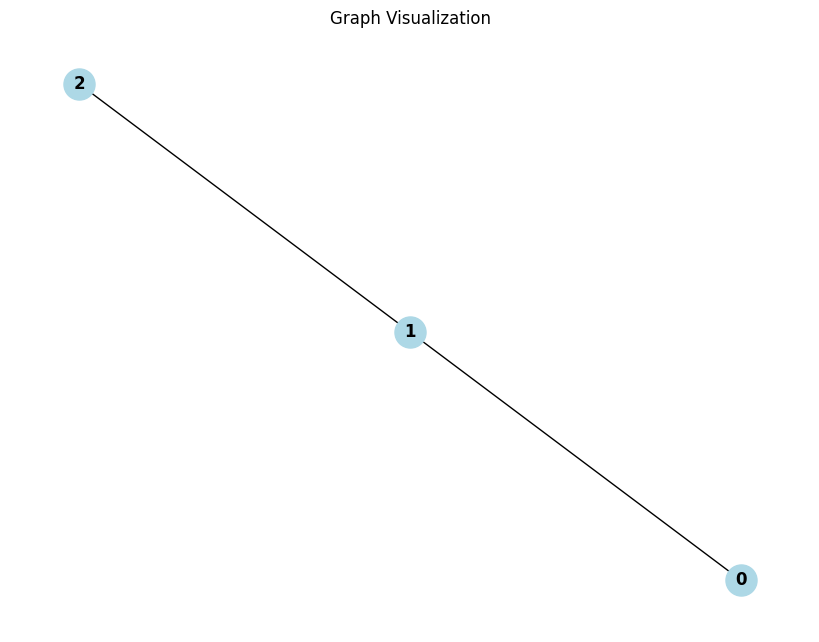

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Take the first week's data for visualization
data = data_week_list[0]  # Change index to visualize other weeks

# Convert the PyTorch Geometric Data object to a NetworkX graph
G = to_networkx(data, to_undirected=True)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500)
plt.title('Graph Visualization')
plt.show()


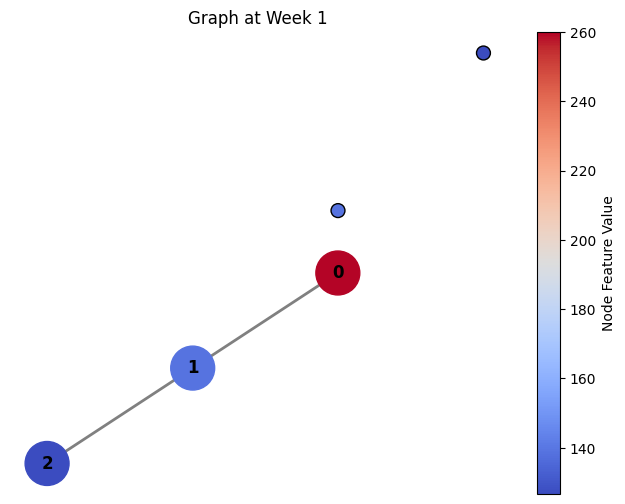

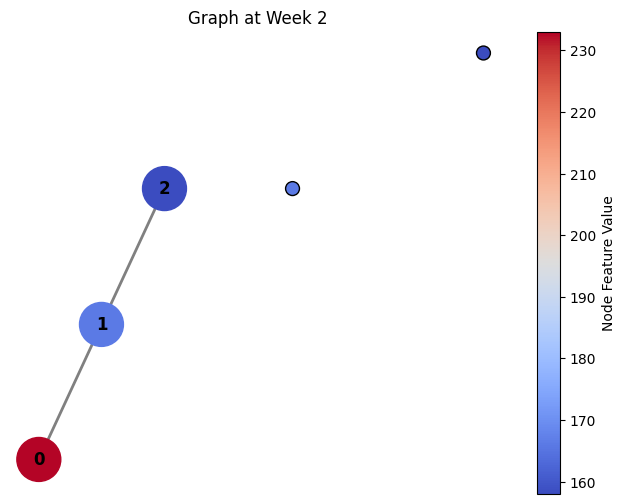

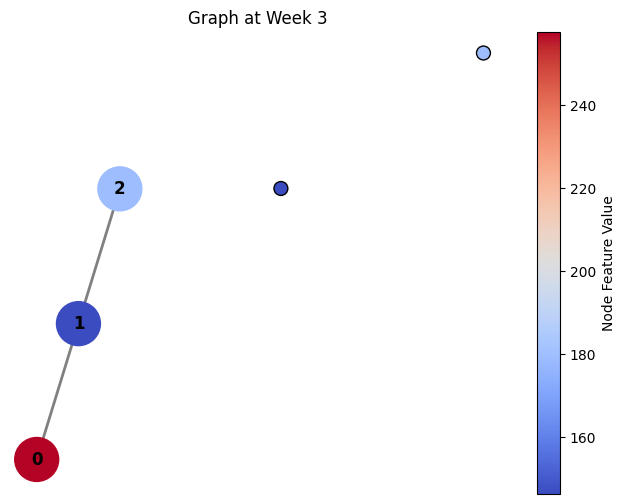

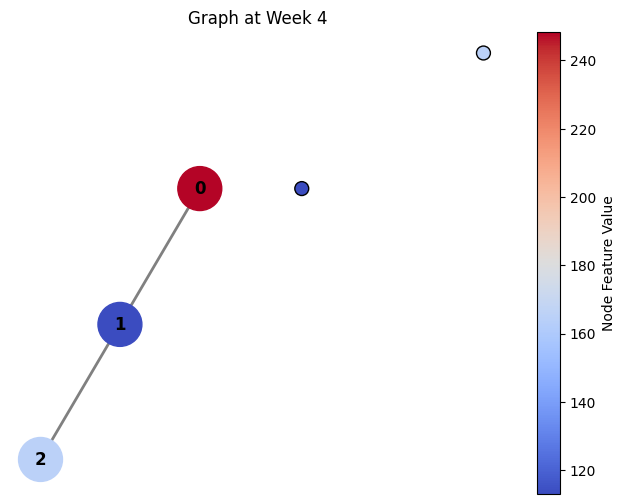

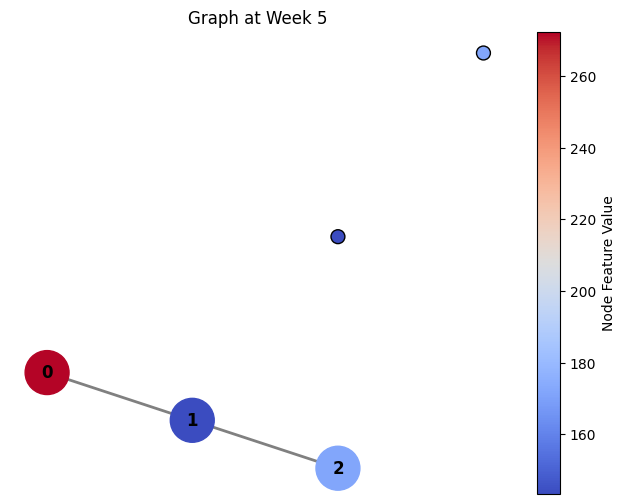

In [ ]:
import torch
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx
import random
import matplotlib.cm as cm
import matplotlib.colors as colors

# Simulate weekly data for 5 weeks
data_week_list = []

for week in range(5):  # Assuming 5 weeks of data
    node_features = [
        [random.randint(100, 200), random.randint(200, 300), random.randint(300, 400)],  # Node 0 (Company A)
        [random.randint(50, 150), random.randint(100, 200), random.randint(150, 250)],   # Node 1 (Company B)
        [random.randint(60, 160), random.randint(120, 220), random.randint(180, 280)],   # Node 2 (Company C)
    ]

    x = torch.tensor(node_features, dtype=torch.float)

    edge_index = torch.tensor([
        [0, 1, 1, 2],  # Source nodes
        [1, 0, 2, 1],  # Target nodes
    ], dtype=torch.long)

    edge_type = torch.tensor([0, 0, 1, 2], dtype=torch.long)
    edge_attr = torch.tensor([1.0, 1.0, 0.5, 0.8], dtype=torch.float)

    # Create the Data object for this week's graph
    data_week = Data(x=x, edge_index=edge_index, edge_type=edge_type, edge_attr=edge_attr)

    # Assign random target value
    target = torch.tensor([random.uniform(10, 100) for _ in range(3)], dtype=torch.float).view(-1, 1)
    data_week.y = target

    data_week_list.append(data_week)

# Function to visualize graph at a specific week
def visualize_graph_at_week(data, week):
    G = to_networkx(data, to_undirected=True)

    # Use node features to color nodes (e.g., financial ratios)
    node_colors = [torch.mean(data.x[i]).item() for i in range(data.x.size(0))]  # Color based on feature mean

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Positions for all nodes

    # Create a ScalarMappable for the colorbar, based on the node_colors range
    # and the chosen colormap. We need to handle cases where node_colors might be empty or have identical values.
    if len(node_colors) > 0:
        vmin = min(node_colors)
        vmax = max(node_colors)
        if vmin == vmax: # Handle case where all node_colors are the same to avoid zero range in norm
            vmin -= 0.5
            vmax += 0.5
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
    else:
        norm = colors.Normalize(vmin=0, vmax=1) # Default norm if no nodes

    cmap = cm.get_cmap('coolwarm')
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(node_colors) # Set the data for the mappable

    # Draw graph with colored nodes
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=cmap, norm=norm, node_size=1000, font_weight='bold', edge_color='gray', width=2)

    # Add colorbar using the ScalarMappable
    plt.colorbar(sm, label='Node Feature Value')

    plt.title(f"Graph at Week {week + 1}")
    plt.show()

# Animate the graph over weeks (timelapse visualization)
def animate_graphs(data_week_list):
    for week, data in enumerate(data_week_list):
        visualize_graph_at_week(data, week)
        plt.pause(1)  # Pause to create the animation effect

# Run the animation of graph over 5 weeks
animate_graphs(data_week_list)

##### Geeks

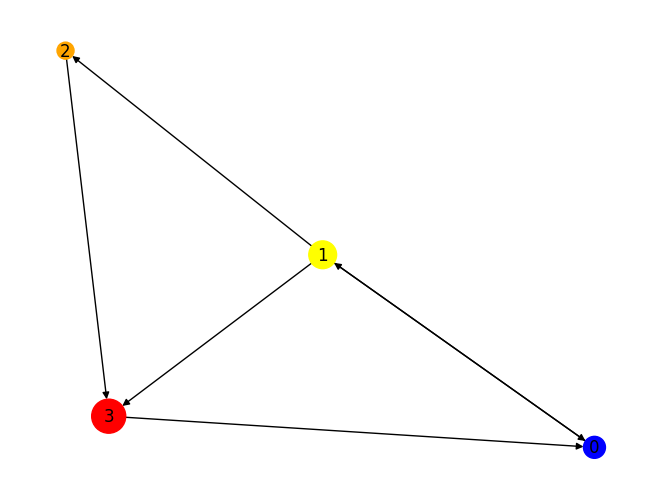

In [ ]:
import networkx as nx
H = nx.DiGraph()

#adding nodes
H.add_nodes_from([
  (0, {"color": "blue", "size": 250}),

  (1, {"color": "yellow", "size": 400}),

  (2, {"color": "orange", "size": 150}),

  (3, {"color": "red", "size": 600})


])

#adding edges
H.add_edges_from([
  (0, 1),

  (1, 2),

  (1, 0),

  (1, 3),

  (2, 3),

  (3,0)


])

node_colors = nx.get_node_attributes(H, "color").values()
colors = list(node_colors)
node_sizes = nx.get_node_attributes(H, "size").values()
sizes = list(node_sizes)

#Plotting Graph
nx.draw(H, with_labels=True, node_color=colors, node_size=sizes)

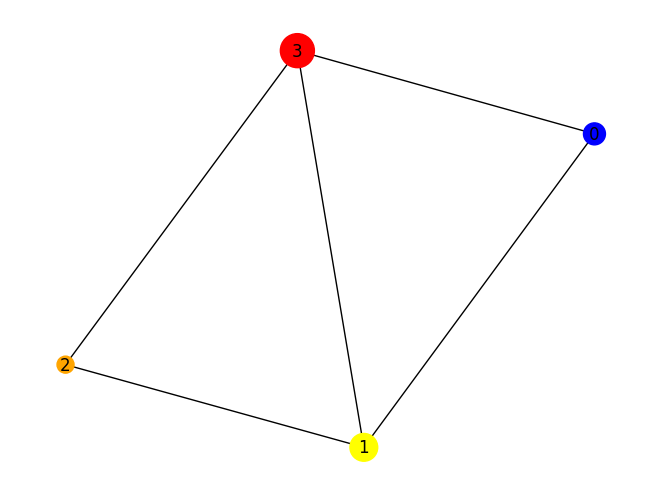

In [ ]:
#converting to undirected graph
G = H.to_undirected()
nx.draw(G, with_labels=True, node_color=colors, node_size=sizes)

In [ ]:
!pip install -q torch

In [ ]:
%%capture
import os
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.
print(data)